### Expt Number : 3
#### Title : GLCM
PRN number : 1032210233
#### Name : Nishant S Soman   
Div : A               
Batch : A4

In [1]:
from skimage import data
from sklearn.feature_extraction.image import extract_patches_2d
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import cv2
import matplotlib.pyplot as plt

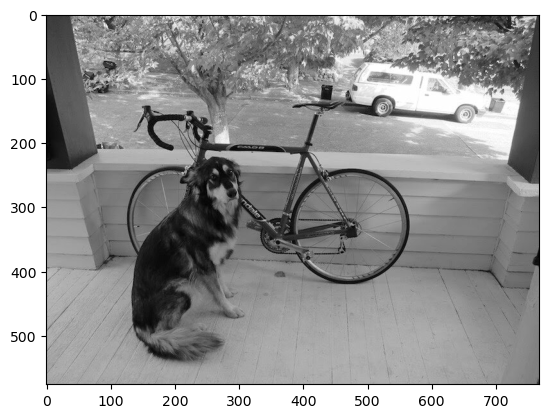

In [2]:
img= cv2.imread('dog.png')
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap= "gray")

In [3]:
img_gray.shape

(576, 768)

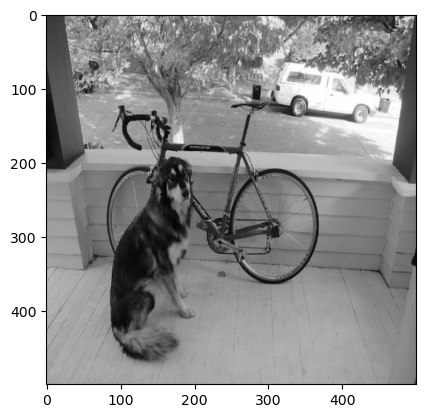

In [4]:
img_resize = cv2.resize(img_gray,(500,500))
plt.imshow(img_resize,cmap="gray")

In [5]:
#create 10x10 patches to compute GLCM properties
patches = []
means = []
patch_len = 10
for i in range(0, img_resize.shape[0] - patch_len + 1, patch_len):
    for j in range(0, img_resize.shape[1] - patch_len + 1, patch_len):
        patch = img_resize[i:i+patch_len, j:j+patch_len]
        patches.append(patch)
        means.append(np.mean(patch))
means = np.array(means).reshape((50,50))

In [6]:
contrast_list = []
correlation_list = []
dissimilarity_list = []
energy_list = []
homogeneity_list = []

for patch in patches:
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    contrast_list.append(graycoprops(glcm, 'contrast')[0, 0])
    correlation_list.append(graycoprops(glcm, 'correlation')[0, 0])
    dissimilarity_list.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    energy_list.append(graycoprops(glcm, 'energy')[0, 0])
    homogeneity_list.append(graycoprops(glcm, 'homogeneity')[0, 0])

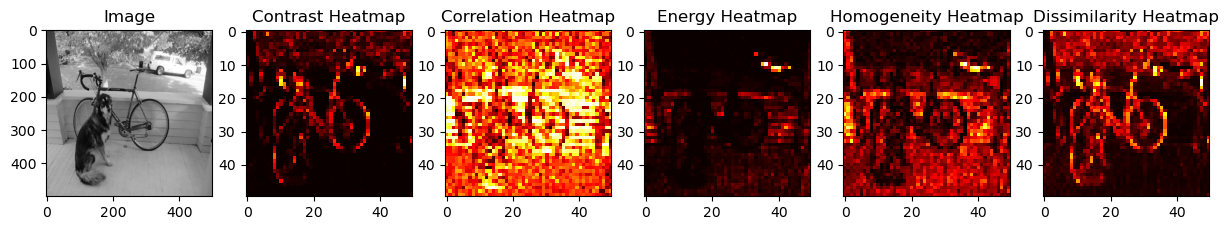

In [7]:
f, ax = plt.subplots(1,6, figsize=(15,15))
prop_names = ["Contrast", "Correlation", "Energy", "Homogeneity", "Dissimilarity"]
props = [contrast_list, correlation_list, energy_list, homogeneity_list, dissimilarity_list]
ax[0].imshow(img_resize, cmap='gray')
ax[0].set_title("Image")

for i in range(1,len(props)+1):
  prop = np.array(props[i-1]).reshape((50,50))
  heatmap = ((prop - np.min(prop)) / (np.max(prop) - np.min(prop))) * 255
  ax[i].imshow(heatmap, cmap = 'hot')
  ax[i].set_title(prop_names[i-1]+" Heatmap")
plt.show()

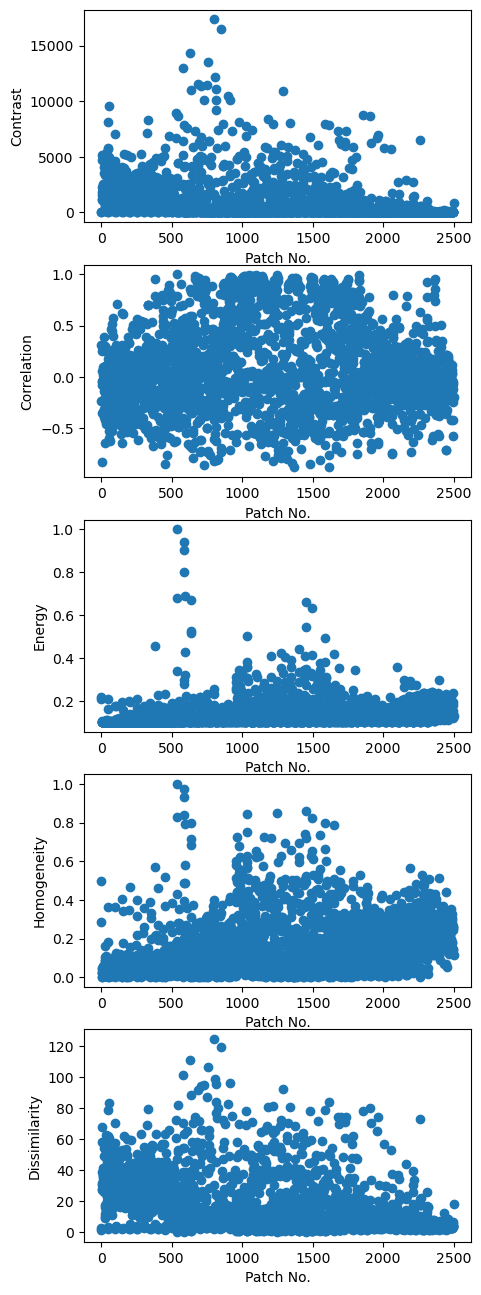

In [8]:
f, ax = plt.subplots(5,1, figsize=(5,16))
prop_names = ["Contrast", "Correlation", "Energy", "Homogeneity", "Dissimilarity"]
props = [contrast_list, correlation_list, energy_list, homogeneity_list, dissimilarity_list]

for i in range(0,len(props)):
  ax[i].scatter(range(len(patches)),props[i])
  ax[i].set_ylabel(prop_names[i])
  ax[i].set_xlabel("Patch No.")

Text(0.5, 1.0, 'Grass')

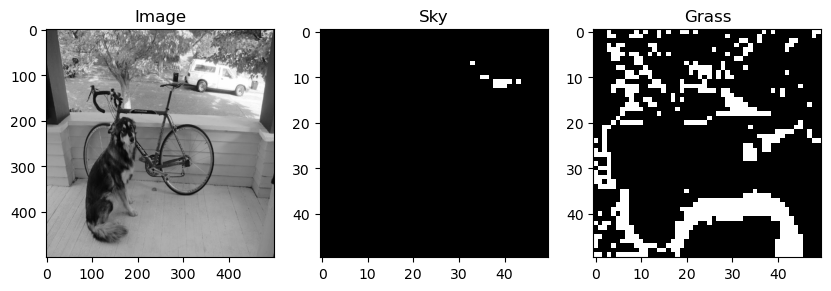

In [9]:
# Segmentation based on homogeneity
homo_list = np.array(homogeneity_list).reshape((50,50))
sky = np.zeros((50,50), dtype=np.uint8)
grass = np.zeros((50,50), dtype=np.uint8)
sky[(homo_list >=0.55) & (means > 190)] = 1
grass[(homo_list <0.55) & (means > 145) & (means < 165)] = 1

f, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(img_resize, cmap='gray')
ax[0].set_title("Image")
ax[1].imshow(sky, cmap='gray')
ax[1].set_title("Sky")
ax[2].imshow(grass, cmap='gray')
ax[2].set_title("Grass")

Text(0.5, 1.0, 'Grass')

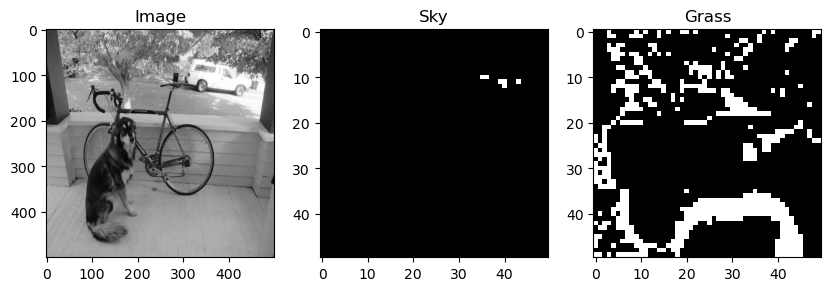

In [10]:

# Segmentation based on dissimilarity
dissim_list = np.array(dissimilarity_list).reshape((50,50))
sky = np.zeros((50,50), dtype=np.uint8)
grass = np.zeros((50,50), dtype=np.uint8)
sky[(dissim_list <0.9) & (means > 190)] = 1
grass[(dissim_list >=0.9) & (means > 145) & (means < 165)] = 1

f, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(img_resize, cmap='gray')
ax[0].set_title("Image")
ax[1].imshow(sky, cmap='gray')
ax[1].set_title("Sky")
ax[2].imshow(grass, cmap='gray')
ax[2].set_title("Grass")

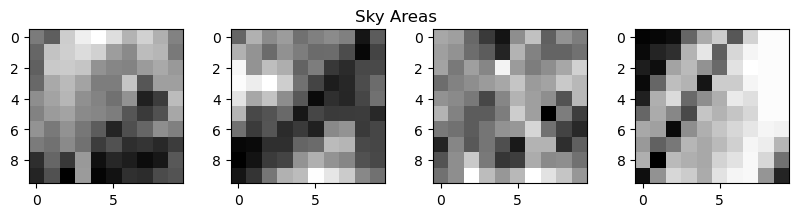

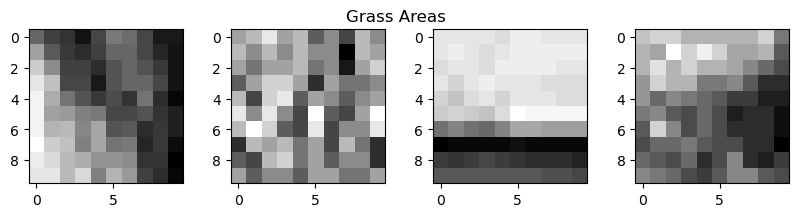

In [11]:
sky_areas = [patches[17],patches[133],patches[271],patches[382]]
grass_areas = [patches[1315],patches[2022],patches[1487],patches[1820]]

sky_corr = []
sky_diss = []
grass_corr = []
grass_diss = []

f, ax = plt.subplots(1,4, figsize=(10,2))
f.suptitle("Sky Areas")
for i in range(len(sky_areas)):
    glcm = graycomatrix(sky_areas[i], distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    sky_corr.append(graycoprops(glcm, 'correlation')[0, 0])
    sky_diss.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ax[i].imshow(sky_areas[i], cmap='gray')

f, ax = plt.subplots(1,4, figsize=(10,2))
f.suptitle("Grass Areas")
for i in range(len(grass_areas)):
    glcm = graycomatrix(grass_areas[i], distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    grass_corr.append(graycoprops(glcm, 'correlation')[0, 0])
    grass_diss.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ax[i].imshow(grass_areas[i], cmap='gray')

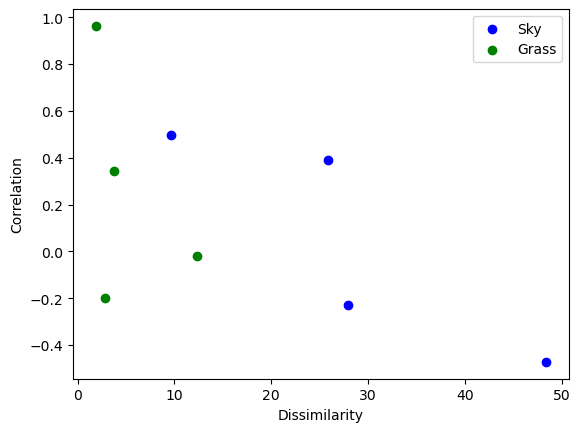

In [12]:
plt.scatter(sky_diss, sky_corr, color='blue', label='Sky')
plt.scatter(grass_diss, grass_corr, color='green', label='Grass')
plt.xlabel('Dissimilarity')
plt.ylabel('Correlation')
plt.legend()
plt.show()